In [1]:
import numpy as np
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pickle
from Fun4CNNFc import *
from read_Fc import read_Fc
from Fun4RegCNN import *
from sklearn.model_selection import train_test_split

In [2]:
connectomes_fc = []
ROIs = []
scores = []

#%%  Directories
current_path = os.getcwd()
#parentPath = os.path.abspath(os.path.join(current_path, '../../'))
#D:/Docs/Encef/
path2fc = "camcan_AEC_ortho_AnteroPosterior"
print(path2fc)
#path2demo = parentPath+'/NewThesis_db_DK/camcan_demographics/'
FcFile = np.sort(os.listdir(path2fc))
#demoFile = np.sort(os.listdir(path2demo))

#%% Find nan values in the score dataframe
# import Fun4newThesis
# reload(Fun4newThesis)

print('Loading the Demographics and score table...')
with open(current_path+'/scoreDf_spanish.pickle', 'rb') as f:
    scoreDf = pickle.load(f)

#lets just keep age for now:
# scoreDf.drop(columns=['Acer','BentonFaces','Cattell','EmotionRecog','Hotel','Ppp','Synsem','VSTM'],inplace=True)
scoreDf.drop(columns=['BentonFaces','ReconocimientoEmociones', 'ForceMatch', 'Hotel', 'Ppp', 'Synsem',
        'VSTM'],inplace=True)
# scoreDf.drop(columns=['Acer','BentonFaces','Cattell','ReconocimientoEmociones', 'ForceMatch', 'Hotel', 'Ppp', 'Synsem',
#         'VSTM'],inplace=True)
row_idx=np.unique(np.where(np.isnan(scoreDf.iloc[:,3:-1].to_numpy()))[0])#rows where there is nan
scoreDf_noNan=scoreDf.drop(row_idx).reset_index(drop=True)
scoreDf_noNan=scoreDf_noNan.drop(np.argwhere(scoreDf_noNan['ID']=='sub_CC721434')[0][0]).reset_index(drop=True)# drop beacuase there is missing connections at the the struct connectomics
#PltDistDemographics(scoreDf_noNan)
edad=np.array(scoreDf_noNan['Edad']).reshape(-1,1)
subjects=scoreDf_noNan['ID']

# with open(current_path+'/scoreDf.pickle', 'rb') as f:
#     scoreDf_old = pickle.load(f)
# subjects_old=scoreDf_old['ID']
# row_idx=[np.argwhere(subjects_old == missing)[0][0] for missing in list(set(subjects_old).difference(set(subjects)))] #Esto solo funciona para las matrices que te paso jason

# sleep(1)
# plt.close('all')

#%% Read Fc
connectomes_fc, ROIs = read_Fc(FcFile,path2fc, subjects,thresholding='MST', per=10) #nt = no threshold
connectome = connectomes_fc['beta']
connectome = (connectome/(np.max(connectome, axis=None)))[:,:,:,np.newaxis]
input_shape = connectome.shape[1:4]
x_train, x_test, y_train, y_test = train_test_split(connectome, edad, test_size=.2)

camcan_AEC_ortho_AnteroPosterior
Loading the Demographics and score table...


100%|██████████| 606/606 [00:24<00:00, 24.91it/s]


In [3]:
# Create the model
model = CNN_Diego(input_shape)
# Compile the model
model.compile(optimizer=Adam(learning_rate=.001), loss='mean_squared_error', metrics=['mae'])
# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30
23/23 [==============================] - 6s 175ms/step - loss: 3113.5251 - mae: 52.7259 - val_loss: 2910.9744 - val_mae: 51.0632
Epoch 2/30
23/23 [==============================] - 4s 164ms/step - loss: 3042.2058 - mae: 52.0732 - val_loss: 2867.7053 - val_mae: 50.6298
Epoch 3/30
23/23 [==============================] - 3s 147ms/step - loss: 2996.9165 - mae: 51.6317 - val_loss: 2830.4639 - val_mae: 50.2597
Epoch 4/30
23/23 [==============================] - 3s 147ms/step - loss: 2951.7483 - mae: 51.1991 - val_loss: 2783.2605 - val_mae: 49.7877
Epoch 5/30
23/23 [==============================] - 4s 157ms/step - loss: 2907.9717 - mae: 50.7656 - val_loss: 2730.6213 - val_mae: 49.2564
Epoch 6/30
23/23 [==============================] - 4s 160ms/step - loss: 2864.3057 - mae: 50.3363 - val_loss: 2677.6641 - val_mae: 48.7161
Epoch 7/30
23/23 [==============================] - 4s 165ms/step - loss: 2821.5510 - mae: 49.9086 - val_loss: 2625.8203 - val_mae: 48.1815
Epoch 8/30
23/23 [==

Loss as Mean squared error from neural net:  1848.737060546875
Mean absolute error from neural net:  38.731407165527344
4/4 [==============================] - 0s 46ms/step


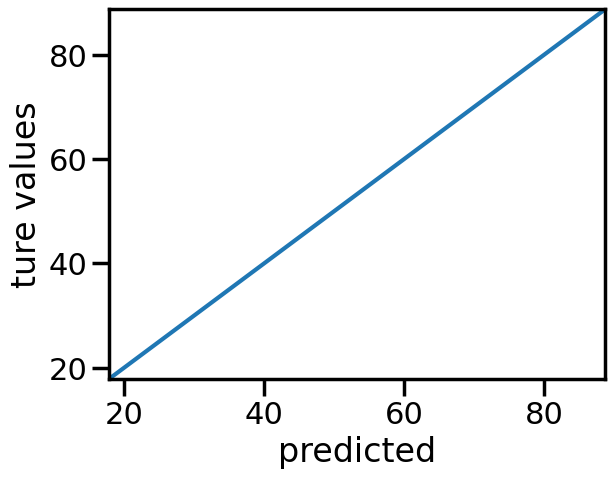

-0.10607229253479082


In [4]:
# Evaluate the model
predictions = evaluateRegModel(model,x_test,y_test)
predictions=predictions.ravel()
y_test=y_test.ravel()
acc = plotPredictionsReg(predictions,y_test,True)
print (acc)

In [5]:
print(input_shape)

(68, 68, 1)
